# Praxisübung: PCA

## ✏ Aufgabe 1 
Schauen Sie sich im folgenden Skript den Abschnitt Hauptkomponentenanalyse an, vergleichen Sie mit den Vorlesungsfolien und versuchen Sie, die einzlnen Schritte nachzuvollziehen.

### Datenset
Der folgende Code erzeugt ein Datenset, anhand dessen man die PCA gut visualisieren kann.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Wir erzeugen uns zufällige Daten in 3 Dimensionen (Source: Hands-on Machine Learning) 
np.random.seed(42)
m = 500
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

### Hauptkomponentenanalyse

<BarContainer object of 3 artists>

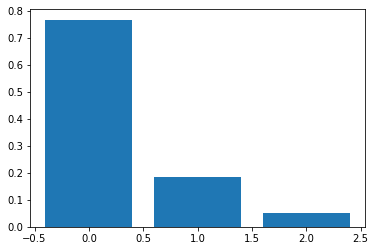

In [36]:
# Anzahl Komponenten
m = 2

# Schritt 1: Standardisieren
X_zent = (X - X.mean(axis=0)) / X.std(axis=0)

# Schritt 2: SVD der zentrierten Featurematrix (man könnte stattdessen auch eine Eigenwertzerlegung von X^TX machen)
U, S, Vt = np.linalg.svd(X_zent)

# Schritt 3: Projizieren auf 2D mit den ersten zwei Zeilen von VT (bzw. Spalten von V). 
# Das entspricht der .predict() Methode der PCA für zwei Hauptkomponenten).
X2D = X_zent @ Vt[:m,:].T

# Rekonstruierte Version der Daten (in 3d!)
X_tilde = X2D @ Vt[:m,:]*X.std(axis=0) + X.mean(axis=0)

# Quadrat der Singulärwerte (=Eigenwerte der Kovarianzmatrix) normiert ergibt "% Varianz erklärt" jeder Komponente
plt.bar(range(3), S**2/(S**2).sum())

### Plotten der Daten in 3d 
(benötigt plotly: Anaconda Prompt -> `conda activate dmml1` -> `pip install plotly`)

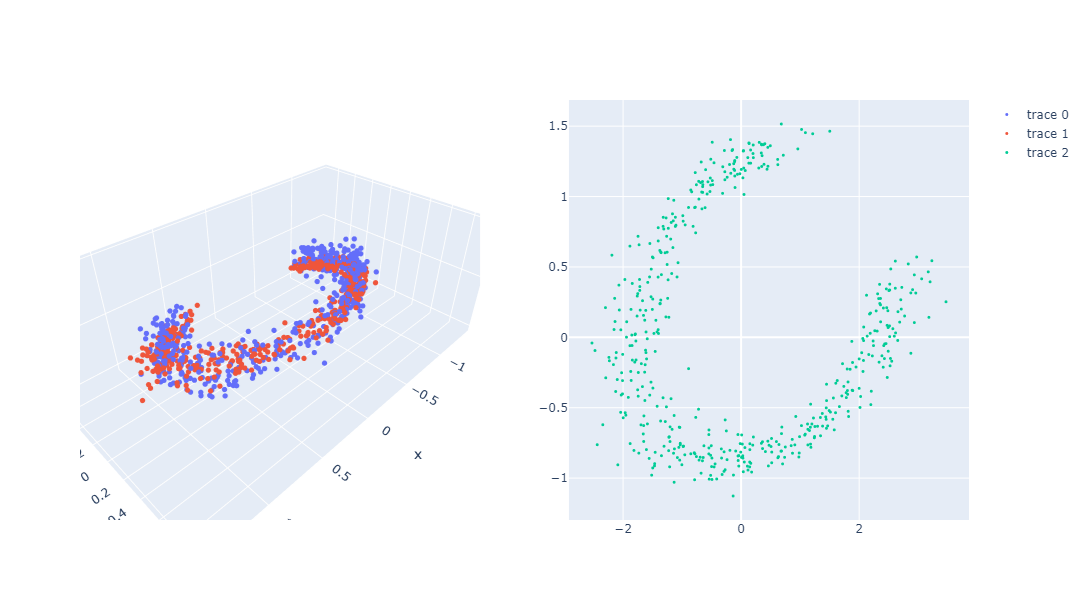

In [37]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Plot in 3d und 2d
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "scene"}, {"type": "xy"}]],)
fig.add_trace(go.Scatter3d(x=X[:,0], y=X[:,1], z=X[:,2], mode="markers"),row=1, col=1)
fig.add_trace(go.Scatter3d(x=X_tilde[:,0], y=X_tilde[:,1], z=X_tilde[:,2], mode="markers"),row=1, col=1)
fig.add_trace(go.Scatter(x=X2D[:, 0], y=X2D[:, 1], mode="markers"),row=1, col=2)
fig.update_traces(marker=dict(size=3))
fig.update_layout(height=600, width=1200)
fig.show()

## ✏ Aufgabe 2: Eigengesichter 🤯
Das Ziel der Aufgabe ist es, für ein Datenset mit vielen Features eine Dimensionsreduktion mittels PCA durchzuführen. Für die reduzierte Darstellung soll ein SVM Klassifikator trainiert werden. Bei den Daten handelt es sich um das Olivetti Faces Datenset (Teil von scikit-learn). Ausführen der Zellen unten lädt die Daten herunter, spaltet in Trainings- und Testset auf und zeigt einige der 400 Bilder an. Zu sehen sind Porträts von insgesamt 40 Personen, wobei für jede 10 Porträts existieren. Das Ziel des Klassifikators ist, jedes Bild einer der 10 Personen (Klassen) zuzuordnen.

Gehen Sie bei der Aufgabe wie folgt vor:
1. Skalieren Sie die Daten (Sie können entweder den StandardScaler benutzen oder die Skalierung selbst mit den entsprechenden NumPy Methoden durchführen).
2. Trainieren Sie eine Principal Componen Analysis auf dem Trainingsset mittels SVD oder Eigenwertzerlegung.
3. Visualisieren Sie einige der Eigenvektoren (Eigengesichter). Tipp: Ein Vektor `v` kann mit `v.reshape(64,64)` auf die Form eines Bildes gebracht werden.
4. Visualisieren Sie Rekonstruktionen aus dem Trainings- und aus dem Testset für eine verschiedene Anzahl an Komponenten. Probieren Sie dafür verschiedene Werte aus, z.B. $m\in\{1,5,10,50,100,150,250,500\}$. Mit wie vielen Komponenten bekommt man theoretisch eine perfekte Rekonstruktion aus dem Trainingsset? Kann man auch eine perfekte Rekonstruktion für das Testset erhalten? Wenn ja, wie viele Komponenten bräuchte man dafür?
5. Plotten Sie die "% erklärte Varianz"  (kumulierte Summe der Singulärwerte / Summe der Singulärwerte).
6. Trainieren Sie eine lineare SVM für verschiedene Werte von $m$ und evaluieren Sie die Güte (Accuracy).

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Achtung: im Hochschulnetz muss vor dem Download evtl. der Proxy deaktiviert werden!
faces = datasets.fetch_olivetti_faces()

# 40 Personen, 10 Bilder pro Person = 400 Bilder
# Eine Zeile = 1 Bild (64 x 64 = 4096 Pixel = Anzahl Features). 
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


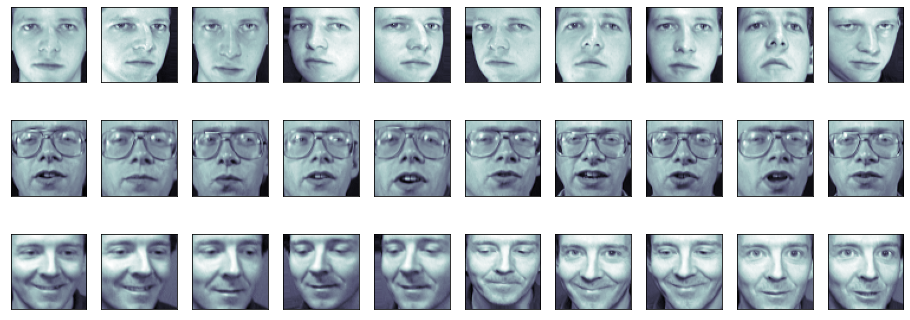

In [5]:
# Plotten einiger Bilder (die Zeilen der Datenmatrix faces.data sind unter faces.images als Matrizen verfügbar.
fig = plt.figure(figsize=(16, 8))
show_n_images = 30
for i in range(show_n_images):
    ax = fig.add_subplot(show_n_images//10+1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)